In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn import cross_validation
from sklearn.grid_search import GridSearchCV
from sklearn import tree
from wordcloud import WordCloud

In [34]:
import pickle

filename='X_train'
infile = open(filename,'rb')
X_train=pickle.load(infile)
infile.close()

filename='y_train'
infile = open(filename,'rb')
y_tr=pickle.load(infile)
infile.close()

filename='X_test'
infile = open(filename,'rb')
X_test=pickle.load(infile)
infile.close()

filename='y_test'
infile = open(filename,'rb')
y_test=pickle.load(infile)
infile.close()

In [35]:
#Unpickling
import pickle

infile = open('count_vect_BOW','rb')
count_vect=pickle.load(infile)
infile.close()

infile = open('Train_BOW_Std','rb')
X_train_Bow_standarized_data=pickle.load(infile)
infile.close()

infile = open('Test_BOW_Std','rb')
X_test_BOW_standarized_data=pickle.load(infile)
infile.close()

infile = open('tf_idf_vect_TF-IDF','rb')
tf_idf_vect = pickle.load(infile)
infile.close()

infile = open('Train_TFIDF_Std','rb')
X_train_tfidf_standarized_data=pickle.load(infile)
infile.close()

infile = open('Test_TFIDF_Std','rb')
X_test_tfidf_standarized_data=pickle.load(infile)
infile.close()

infile = open('Train_AvgW2V_std','rb')
X_train_AvgW2V_standarized_data=pickle.load(infile)
infile.close()


infile = open('Test_AvgW2V_std','rb')
X_test_AvgW2V_standarized_data=pickle.load(infile)
infile.close()

infile = open('TFIDF_W2V_Train_standarized_data','rb')
X_train_TFIDF_W2V_standarized_data=pickle.load(infile)
infile.close()

infile = open('TFIDF_W2V_Test_standarized_data','rb')
X_test_TFIDF_W2V_standarized_data=pickle.load(infile)
infile.close()


# GridSearch

In [36]:
def DT_GRIDSEARCH(X_train,y_train):
    param_grid = [{"max_depth": range(1,51,4)
                  }]
    

    dt=DecisionTreeClassifier(class_weight="balanced")
    model= GridSearchCV(dt, param_grid,n_jobs=-1,scoring='f1')
    model.fit(X_train, y_train)
    best_estimator= model.best_estimator_
    best_params = model.best_params_
    
    return best_estimator,best_params

# CV_Error_Plot

In [37]:
def CV_Error_Plot(X_Train,y_Train):
    # creating odd list of max_depth for Decision tree
    depth_list= list(range(1,51,4))

    # empty list that will hold cv scores
    cv_scores = []

    # perform 10-fold cross validation
    for depth in depth_list:
        DT =DecisionTreeClassifier(max_depth=depth,class_weight='balanced')
        scores = cross_val_score(DT, X_Train, y_Train, cv=3, scoring='accuracy',n_jobs=-1)
        cv_scores.append(scores.mean())

    # changing to misclassification error
    MSE = [1 - x for x in cv_scores]

    # determining best max_depth
    optimal_depth = depth_list[MSE.index(min(MSE))]
    print('\nThe optimal depth is : {}'.format(optimal_depth))

    # plot misclassification error vs depth 
    plt.plot(depth_list, MSE)

    for xy in zip(depth_list, np.round(MSE,3)):
        plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

    plt.xlabel('Depth')
    plt.ylabel('Misclassification Error')
    plt.show()
    print("the misclassification error for each depth value is : ", np.round(MSE,3)) 
    return optimal_depth

# Training_Error,Test_Error

In [38]:
def Train_Test_Error(max_depth,X_train,y_train,X_test,y_test):
    DT_clf = DecisionTreeClassifier(max_depth= max_depth,class_weight='balanced')
    DT_model = DT_clf.fit(X_train, y_train)

    #Training Error
    y_pred_tr = DT_clf.predict(X_train)
    acc_tr = accuracy_score(y_train, y_pred_tr)
    train_error = 1-acc_tr
    print('\n Train error is : {}'.format(train_error))

    #Test Error
    y_pred_ts = DT_clf.predict(X_test)
    acc_ts = accuracy_score(y_test, y_pred_ts)
    test_error = 1-acc_ts
    print('\n Test error is : {}'.format(test_error))
    
    return train_error,test_error,y_pred_ts,DT_model

# Confusion Matrix 

In [39]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# DT-BOW

In [40]:
best_estimator_bow,best_params_bow = DT_GRIDSEARCH(X_train_Bow_standarized_data,y_tr)
print best_estimator_bow
print best_params_bow

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=49, max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
{'max_depth': 49}


In [41]:
filename='best_estimator_bow_DT'
outfile=open(filename,'wb')
pickle.dump(best_estimator_bow, outfile)
outfile.close()

filename='best_params_bow_DT'
outfile=open(filename,'wb')
pickle.dump(best_params_bow, outfile)
outfile.close()


The optimal depth is : 49


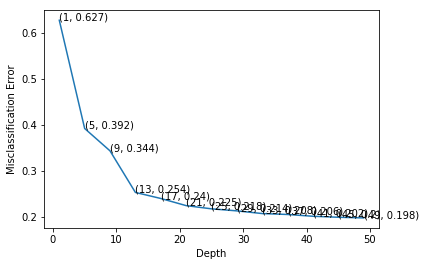

('the misclassification error for each depth value is : ', array([0.627, 0.392, 0.344, 0.254, 0.24 , 0.225, 0.218, 0.214, 0.208,
       0.206, 0.202, 0.2  , 0.198]))


In [42]:
optimal_depth_bow = CV_Error_Plot(X_train_Bow_standarized_data,y_tr)

In [43]:
train_error_bow,test_error_bow,y_pred_ts_bow,model_bow=Train_Test_Error(best_params_bow["max_depth"],X_train_Bow_standarized_data,y_tr,X_test_BOW_standarized_data,y_test)


 Train error is : 0.059242863188

 Test error is : 0.202650867798



  CLASSIFICATION REPORT
             precision    recall  f1-score   support

          0       0.44      0.61      0.51      4557
          1       0.91      0.84      0.87     21774

avg / total       0.83      0.80      0.81     26331


  CONFUSION MATRIX
[[ 2792  1765]
 [ 3571 18203]]

  Plot of CONFUSION MATRIX


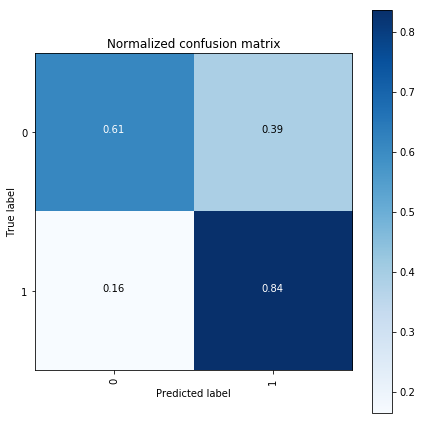

In [44]:
from sklearn.metrics import classification_report
#Evaluate precission,recall,f1-score
classification_report = classification_report(y_test, y_pred_ts_bow)
print "\n  CLASSIFICATION REPORT"
print classification_report

#determine Confusion matrix  and plotting
cm = confusion_matrix(y_test, y_pred_ts_bow)
print "\n  CONFUSION MATRIX"
print cm
print "\n  Plot of CONFUSION MATRIX"
plt.figure(figsize=(6,6))
plt.grid(b=False)
plot_confusion_matrix(cm, classes=['0','1'], normalize=True, title='Normalized confusion matrix', cmap = plt.cm.Blues)
plt.show()

In [45]:
index_to_word = {v:k for k,v in count_vect.vocabulary_.items()}

In [58]:
weights=[(i,model_bow.feature_importances_[i]) for i in np.nonzero(model_bow.feature_importances_)[0]]
weights2=sorted(weights,reverse=True,key=lambda x: x[1])
sorted_indices=[i[0] for i in weights2]

In [60]:
words=[]
for i in sorted_indices:
    words.append(index_to_word[i])

print ('Postive Words::',words[0:20])
print ('Negative Words::',words[-20:])

('Postive Words::', [u'great', u'love', u'disappoint', u'best', u'delici', u'bad', u'good', u'perfect', u'favorit', u'product', u'thought', u'would', u'excel', u'tast', u'nice', u'money', u'return', u'like', u'review', u'tasti'])
('Negative Words::', [u'gnawhid', u'lip', u'thrill', u'purpos', u'sproutpeopl', u'maintain', u'otherwis', u'nong', u'tantal', u'onto', u'holiday', u'arent', u'ridicul', u'eiermann', u'safe', u'truth', u'altern', u'francisco', u'job', u'airi'])


In [86]:
import graphviz
data=tree.export_graphviz(model_bow, out_file=None,
                         feature_names=index_to_word,
                         class_names=['0','1'],
                         filled=True, rounded=True,
                         special_characters=True)
graph = graphviz.Source(data)
graph.render('dt_bow_graph',view=True)


'dt_bow_graph.pdf'

In [103]:
weights3=[(index_to_word[i],model_bow.feature_importances_[i]) for i in np.nonzero(model_bow.feature_importances_)[0]]
weights4=sorted(weights3,reverse=True,key=lambda x: x[1])
dict_words= dict()
for i in range(len(weights4)):
    dict_words[weights4[i][0]] = weights4[i][1] 

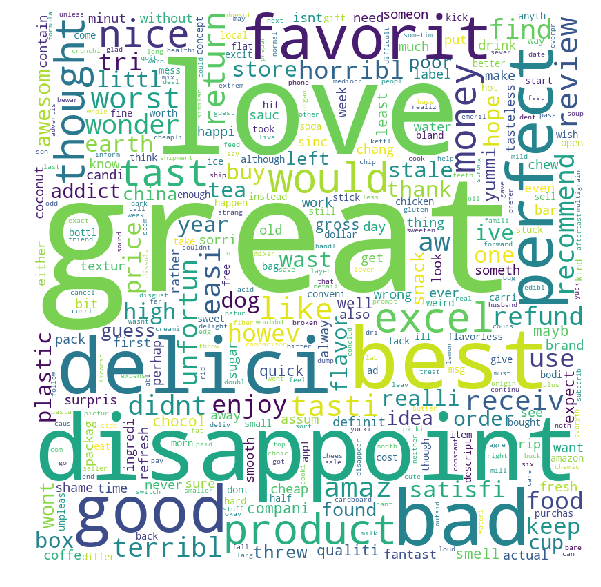

In [104]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                max_words=2000, 
                min_font_size = 10).generate_from_frequencies(dict_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

# DT-TFIDF

In [64]:
best_estimator_tfidf,best_params_tfidf = DT_GRIDSEARCH(X_train_tfidf_standarized_data,y_tr)
print best_estimator_tfidf
print best_params_tfidf

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=49, max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
{'max_depth': 49}



The optimal depth is : 49


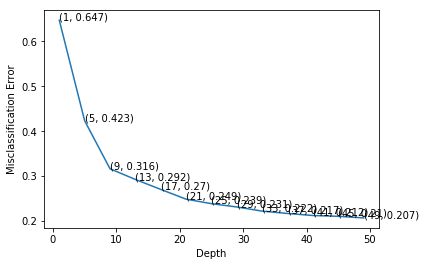

('the misclassification error for each depth value is : ', array([0.647, 0.423, 0.316, 0.292, 0.27 , 0.249, 0.239, 0.231, 0.222,
       0.217, 0.212, 0.21 , 0.207]))


In [65]:
optimal_depth_tfidf = CV_Error_Plot(X_train_tfidf_standarized_data,y_tr)

In [66]:
train_error_tfidf,test_error_tfidf,y_pred_ts_tfidf,model_tfidf=Train_Test_Error(best_params_tfidf["max_depth"],X_train_tfidf_standarized_data,y_tr,X_test_tfidf_standarized_data,y_test)


 Train error is : 0.0660134761238

 Test error is : 0.206258782424



  CLASSIFICATION REPORT
             precision    recall  f1-score   support

          0       0.43      0.61      0.51      4557
          1       0.91      0.83      0.87     21774

avg / total       0.83      0.79      0.81     26331


  CONFUSION MATRIX
[[ 2789  1768]
 [ 3663 18111]]

  Plot of CONFUSION MATRIX


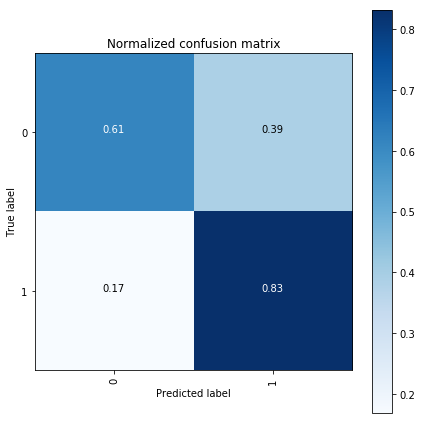

In [67]:
from sklearn.metrics import classification_report
#Evaluate precission,recall,f1-score
classification_report = classification_report(y_test, y_pred_ts_tfidf)
print "\n  CLASSIFICATION REPORT"
print classification_report

#determine Confusion matrix  and plotting
cm = confusion_matrix(y_test, y_pred_ts_tfidf)
print "\n  CONFUSION MATRIX"
print cm
print "\n  Plot of CONFUSION MATRIX"
plt.figure(figsize=(6,6))
plt.grid(b=False)
plot_confusion_matrix(cm, classes=['0','1'], normalize=True, title='Normalized confusion matrix', cmap = plt.cm.Blues)
plt.show()

In [68]:
index_to_word = {v:k for k,v in tf_idf_vect.vocabulary_.items()}

In [69]:
weights=[(i,model_tfidf.feature_importances_[i]) for i in np.nonzero(model_tfidf.feature_importances_)[0]]
weights2=sorted(weights,reverse=True,key=lambda x: x[1])
sorted_indices=[i[0] for i in weights2]

words=[]
for i in sorted_indices:
    words.append(index_to_word[i])

print ('Postive Words::',words[0:20])
print ('Negative Words::',words[-20:])

('Postive Words::', [u'great', u'love', u'best', u'disappoint', u'delici', u'good', u'perfect', u'bad', u'tast', u'favorit', u'nice', u'excel', u'thought', u'product', u'use', u'find', u'money', u'would', u'like', u'amaz'])
('Negative Words::', [u'hasnt', u'cutter', u'nourish', u'special', u'instruct', u'stiff', u'subscript', u'passion', u'louisiana', u'compani', u'addit', u'wife', u'cupcak', u'prompt', u'italian', u'contamin', u'drain', u'sticki', u'present', u'line'])


In [87]:
import graphviz
data=tree.export_graphviz(model_tfidf, out_file=None,
                         feature_names=index_to_word,
                         class_names=['0','1'],
                         filled=True, rounded=True,
                         special_characters=True)
graph = graphviz.Source(data)
graph.render('dt_tfidf_graph',view=True)


'dt_tfidf_graph.pdf'

In [101]:
weights3=[(index_to_word[i],model_tfidf.feature_importances_[i]) for i in np.nonzero(model_tfidf.feature_importances_)[0]]
weights4=sorted(weights3,reverse=True,key=lambda x: x[1])
dict_words= dict()
for i in range(len(weights4)):
    dict_words[weights4[i][0]] = weights4[i][1] 

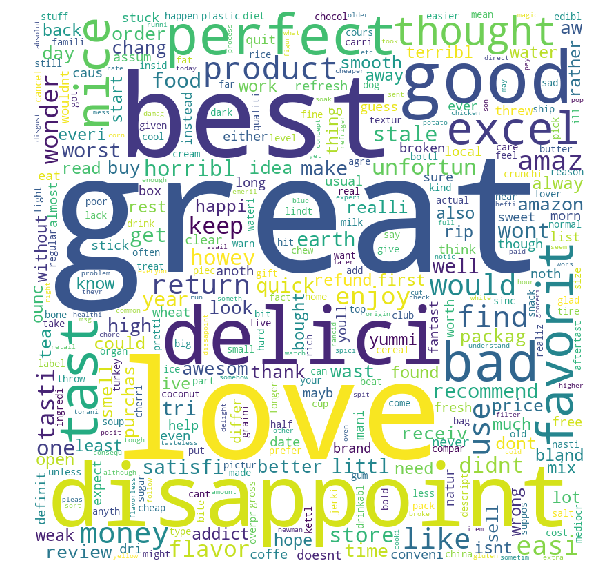

In [102]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                max_words=2000, 
                min_font_size = 10).generate_from_frequencies(dict_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

# DT - AvgW2V

In [70]:
best_estimator_avgw2v,best_params_avgw2v = DT_GRIDSEARCH(X_train_AvgW2V_standarized_data,y_tr)
print best_estimator_avgw2v
print best_params_avgw2v

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=41, max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
{'max_depth': 41}



The optimal depth is : 41


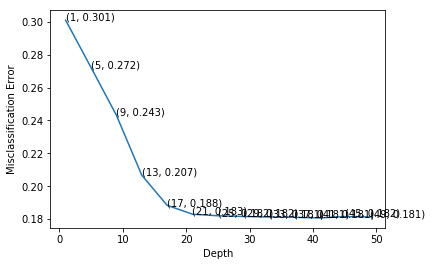

('the misclassification error for each depth value is : ', array([0.301, 0.272, 0.243, 0.207, 0.188, 0.183, 0.182, 0.182, 0.181,
       0.181, 0.181, 0.182, 0.181]))


In [71]:
optimal_depth_AvgW2V = CV_Error_Plot(X_train_AvgW2V_standarized_data,y_tr)

In [72]:
train_error_avgw2v,test_error_avgw2v,y_pred_ts_avgw2v,model_avgw2v=Train_Test_Error(best_params_avgw2v["max_depth"],X_train_AvgW2V_standarized_data,y_tr,X_test_AvgW2V_standarized_data,y_test)


 Train error is : 0.000325510237297

 Test error is : 0.219665033611



  CLASSIFICATION REPORT
             precision    recall  f1-score   support

          0       0.34      0.28      0.31      4557
          1       0.85      0.89      0.87     21774

avg / total       0.76      0.78      0.77     26331


  CONFUSION MATRIX
[[ 1273  3284]
 [ 2500 19274]]

  Plot of CONFUSION MATRIX


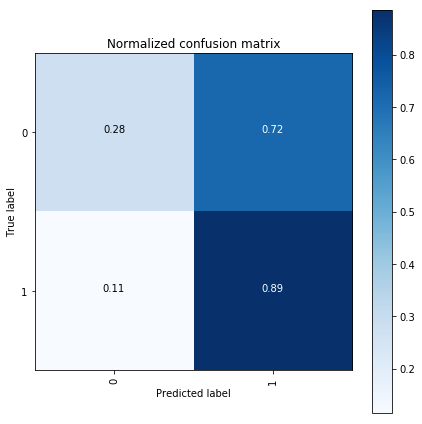

In [73]:
from sklearn.metrics import classification_report
#Evaluate precission,recall,f1-score
classification_report = classification_report(y_test, y_pred_ts_avgw2v)
print "\n  CLASSIFICATION REPORT"
print classification_report

#determine Confusion matrix  and plotting
cm = confusion_matrix(y_test, y_pred_ts_avgw2v)
print "\n  CONFUSION MATRIX"
print cm
print "\n  Plot of CONFUSION MATRIX"
plt.figure(figsize=(6,6))
plt.grid(b=False)
plot_confusion_matrix(cm, classes=['0','1'], normalize=True, title='Normalized confusion matrix', cmap = plt.cm.Blues)
plt.show()

# DT-TFIDFAVGW2V

In [74]:
best_estimator_TFIDF_W2V,best_params_TFIDF_W2V = DT_GRIDSEARCH(X_train_TFIDF_W2V_standarized_data,y_tr)
print best_estimator_TFIDF_W2V
print best_params_TFIDF_W2V

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=33, max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
{'max_depth': 33}


In [75]:
train_error_TFIDF_W2V,test_error_TFIDF_W2V,y_pred_ts_TFIDF_W2V,model_TFIDF_W2V=Train_Test_Error(best_params_TFIDF_W2V["max_depth"],X_train_TFIDF_W2V_standarized_data,y_tr,X_test_TFIDF_W2V_standarized_data,y_test)


 Train error is : 0.00226229614921

 Test error is : 0.221184155558



The optimal depth is : 45


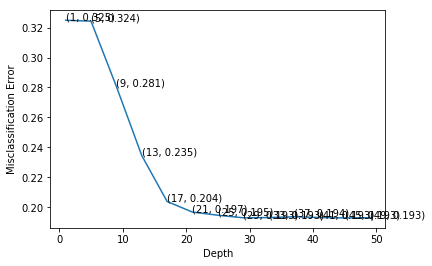

('the misclassification error for each depth value is : ', array([0.325, 0.324, 0.281, 0.235, 0.204, 0.197, 0.195, 0.193, 0.193,
       0.194, 0.193, 0.193, 0.193]))


In [76]:
optimal_alpha_tfidf = CV_Error_Plot(X_train_TFIDF_W2V_standarized_data,y_tr)


  CLASSIFICATION REPORT
             precision    recall  f1-score   support

          0       0.32      0.24      0.27      4557
          1       0.85      0.89      0.87     21774

avg / total       0.76      0.78      0.77     26331


  CONFUSION MATRIX
[[ 1084  3473]
 [ 2351 19423]]

  Plot of CONFUSION MATRIX


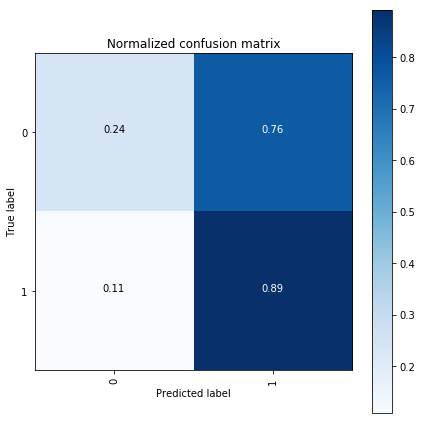

In [77]:
from sklearn.metrics import classification_report
#Evaluate precission,recall,f1-score
classification_report = classification_report(y_test, y_pred_ts_TFIDF_W2V)
print "\n  CLASSIFICATION REPORT"
print classification_report

#determine Confusion matrix  and plotting
cm = confusion_matrix(y_test, y_pred_ts_TFIDF_W2V)
print "\n  CONFUSION MATRIX"
print cm
print "\n  Plot of CONFUSION MATRIX"
plt.figure(figsize=(6,6))
plt.grid(b=False)
plot_confusion_matrix(cm, classes=['0','1'], normalize=True, title='Normalized confusion matrix', cmap = plt.cm.Blues)
plt.show()

# Summary

In [80]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Vectorization Model", "MaxDepth", "Training Error","Test Error"]

x.add_row(["Bow", best_params_bow["max_depth"],round(train_error_bow*100,2),round(test_error_bow*100,2)])


x.add_row(["TFIDF", best_params_tfidf["max_depth"],round(train_error_tfidf*100,2),round(test_error_tfidf*100,2)])


x.add_row(["AvgW2V", best_params_avgw2v["max_depth"],round(train_error_avgw2v*100,2),round(test_error_avgw2v*100,2)])

x.add_row(["TFIDF-W2V", best_params_TFIDF_W2V["max_depth"],round(train_error_TFIDF_W2V*100,2),round(test_error_TFIDF_W2V*100,2)])


print(x)

+---------------------+----------+----------------+------------+
| Vectorization Model | MaxDepth | Training Error | Test Error |
+---------------------+----------+----------------+------------+
|         Bow         |    49    |      5.92      |   20.27    |
|        TFIDF        |    49    |      6.6       |   20.63    |
|        AvgW2V       |    41    |      0.03      |   21.97    |
|      TFIDF-W2V      |    33    |      0.23      |   22.12    |
+---------------------+----------+----------------+------------+


It is observed that Decision trees performed better with BOW and TFIDF,but when we compare the test error % with other algorithms,the error% is more which is as expected that Decision trees doesn't perfomr well with tet data